# Noteboook destinada al EDA y Preprocesamiento

## Data 
Se suministra la siguiente información: 

dataset.csv 

- **cliente_id**: Codigo correspondiente a cada clientes 
- **aniomes**: Periodo correspondiente al registro año mes en formato yyyyMM 
- **canal**: Canal al que pertenece el clientes (Autoservicio, Kiosco/Maxiquiosco) 
- **region**: Region de la cual forma parte el cliente 
- **minutos_visitados_mes**: Minutos totales en el mes que se visito el cliente en 
cada periodo 
- **cantidad_heladeras**: Cantidad de heladeras que tenia el cliente en el periodo 
- **venta_total_negocios_mes**: Venta del total de los negocios que tuvo el cliente 
unidad Hl vendidos, esta venta puede no corresponder a la suma de los 
negocios por separados ya que incluye algunos productos que no se 
encuentran en los negocios (1,2,3,4) 
- **cantidad_productos_total_negocios_vendidos_mes**: Cantidad de productos 
distintos vendidos en la venta total de todos los negocios en cada periodo 
- **cantidad_compras_total_negocios_mes**: Cantidad de compras totales que el 
cliente hizo en el periodo 
- **dias_entre_compras_total_negocios_mes**: días pasados entre cada compra 
realizada dentro del periodo 
- **venta_negocio1_mes**: Venta correspondiente al negocio 1 en cada periodo, 
unidad Hl vendidos 
- **venta_negocio2_mes**: Venta correspondiente al negocio 2 en cada periodo, 
unidad Hl vendidos 
- **venta_negocio3_mes**: Venta correspondiente al negocio 3 en cada periodo, 
unidad Hl vendidos 
- **venta_negocio4_mes**: Venta correspondiente al negocio 4 en cada periodo, 
unidad Hl vendidos

## 1. Importar librerías y raw data
Todas las librerías (Pandas, NumPy, Seaborn...) y el propio código modular `src/`.

In [ ]:
# Importamos librerías
 
import sys
sys.path.insert(0, '../src/')
import pandas as pd
import importlib
import eda
import read_data
import utils
importlib.reload(read_data)
from read_data import load_dataset
importlib.reload(eda)
import clean
importlib.reload(clean)

from eda import ( 
    check_nulls_nans, 
    resumen_unique_values, 
    verificar_columnas_iguales,
    describe_num_cols
    )
from clean import (
    replace_placeholders,
    estandarizar_categorias,
    imputar_por_cliente,
    imputar_por_moda_regional)

import plots
importlib.reload(plots)

from plots import (
    plot_histogram, 
    plot_countplot, 
    plot_feature_distributions, 
    plot_series_mensuales_subplots
)


In [5]:
# Load Dataset
df = load_dataset()
df.head()

,cliente_id,aniomes,fecha,canal,region,minutos_visitados_mes,cantidad_heladeras,venta_total_negocios_mes,cantidad_productos_total_negocios_vendidos_mes,cantidad_compras_total_negocios_mes,dias_entre_compras_total_negocios_mes,venta_negocio1_mes,venta_negocio2_mes,venta_negocio3_mes,venta_negocio4_mes
0,3e1f078ba07f177421f0aefa1884347d,202501,2025-01-01,AUTOSERVICIO,LITORAL,31.600000,5.0,5.00946,23.0,45.0,0.577778,2.06946,2.94,0.000,0.00
1,58ae3b6ad98d3e3e4ba2b404c9142e0f,202504,2025-04-01,AUTOSERVICIO,GBA MINORISTAS,214.683333,4.0,6.65658,11.0,19.0,1.526316,0.19158,1.83,4.275,0.36
2,f3a854fb42adecbc313785f1f1629ffe,202407,2024-07-01,KIOSCOS/MAXIKIOSCOS,NEA,17.433333,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.00,0.000,0.00
3,e7d278a2f3c239afeaf9526d7e275401,202412,2024-12-01,KIOSCOS/MAXIKIOSCOS,LITORAL,24.733333,2.0,0.00000,0.0,0.0,0.000000,0.00000,0.00,0.000,0.00
4,3f4bd1f117b18afa131c48de15486652,202411,2024-11-01,KIOSCOS/MAXIKIOSCOS,GBA MINORISTAS,11.166667,2.0,0.00000,0.0,0.0,0.000000,0.00000,0.00,0.000,0.00


## 2. EDA + Limpieza

In [6]:
target = 'minutos_visitados_mes'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196571 entries, 0 to 196570
Data columns (total 15 columns):
 #   Column                                          Non-Null Count   Dtype         
---  ------                                          --------------   -----         
 0   cliente_id                                      196571 non-null  object        
 1   aniomes                                         196571 non-null  int64         
 2   fecha                                           196571 non-null  datetime64[ns]
 3   canal                                           196571 non-null  object        
 4   region                                          196571 non-null  object        
 5   minutos_visitados_mes                           196571 non-null  float64       
 6   cantidad_heladeras                              182516 non-null  float64       
 7   venta_total_negocios_mes                        182520 non-null  float64       
 8   cantidad_productos_total_negocios_

Chequeo de datos duplicados

In [8]:
df.duplicated().sum()

25

In [9]:
df[df.duplicated()]

,cliente_id,aniomes,fecha,canal,region,minutos_visitados_mes,cantidad_heladeras,venta_total_negocios_mes,cantidad_productos_total_negocios_vendidos_mes,cantidad_compras_total_negocios_mes,dias_entre_compras_total_negocios_mes,venta_negocio1_mes,venta_negocio2_mes,venta_negocio3_mes,venta_negocio4_mes
196112,0006d8e5e3b51edff13026e4d5ab88bc,202410,2024-10-01,KIOSCOS/MAXIKIOSCOS,LITORAL,64.466667,0.0,0.23352,4.0,6.0,6.000000,0.11352,0.12,0.00,0.0
196113,0006d8e5e3b51edff13026e4d5ab88bc,202407,2024-07-01,KIOSCOS/MAXIKIOSCOS,LITORAL,58.833333,0.0,0.13000,3.0,4.0,12.500000,0.12000,0.00,0.00,0.0
196114,0006d8e5e3b51edff13026e4d5ab88bc,202502,2025-02-01,KIOSCOS/MAXIKIOSCOS,LITORAL,29.416667,0.0,0.15000,3.0,6.0,6.666667,0.00000,0.15,0.00,0.0
196115,0006d8e5e3b51edff13026e4d5ab88bc,202409,2024-09-01,KIOSCOS/MAXIKIOSCOS,LITORAL,62.616667,0.0,0.09000,2.0,3.0,7.000000,0.00000,0.09,0.00,0.0
196116,0006d8e5e3b51edff13026e4d5ab88bc,202505,2025-05-01,KIOSCOS/MAXIKIOSCOS,LITORAL,58.466667,0.0,0.16000,2.0,3.0,7.333333,0.00000,0.16,0.00,0.0
196117,0006d8e5e3b51edff13026e4d5ab88bc,202404,2024-04-01,KIOSCOS/MAXIKIOSCOS,LITORAL,51.716667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
196118,0006d8e5e3b51edff13026e4d5ab88bc,202408,2024-08-01,KIOSCOS/MAXIKIOSCOS,LITORAL,56.500000,0.0,0.33000,4.0,5.0,8.800000,0.24000,0.00,0.09,0.0
196119,0006d8e5e3b51edff13026e4d5ab88bc,202411,2024-11-01,KIOSCOS/MAXIKIOSCOS,LITORAL,23.966667,0.0,0.33000,9.0,11.0,3.000000,0.00000,0.27,0.06,0.0
196120,0006d8e5e3b51edff13026e4d5ab88bc,202412,2024-12-01,KIOSCOS/MAXIKIOSCOS,LITORAL,27.200000,0.0,0.21000,3.0,8.0,4.375000,0.00000,0.21,0.00,0.0
196121,0006d8e5e3b51edff13026e4d5ab88bc,202405,2024-05-01,KIOSCOS/MAXIKIOSCOS,LITORAL,27.416667,0.0,0.45000,6.0,8.0,5.250000,0.24000,0.21,0.00,0.0


Obs: La mayoría de datos duplicados son de la región LITORAL y del canal KIOSCOS/MAXIKIOSCOS

In [10]:
# Elimino los duplicados
df = df.drop_duplicates()

In [11]:
df.nunique()

cliente_id                                        14038
aniomes                                              14
fecha                                                14
canal                                                 6
region                                                7
minutos_visitados_mes                             29948
cantidad_heladeras                                   19
venta_total_negocios_mes                          61652
cantidad_productos_total_negocios_vendidos_mes       99
cantidad_compras_total_negocios_mes                 329
dias_entre_compras_total_negocios_mes              3667
venta_negocio1_mes                                37821
venta_negocio2_mes                                13118
venta_negocio3_mes                                 3913
venta_negocio4_mes                                  194
dtype: int64

Chequeo de variables categóricas 

In [12]:
pd.set_option('display.max_colwidth', None)
resumen_unique_values(df)

,columna,valores_unicos,valores
1,region,7,"[LITORAL, GBA MINORISTAS, NEA, CENTRAL, NOA, COSTA ATLANTICA, PATAGONIA]"
0,canal,6,"[AUTOSERVICIO, KIOSCOS/MAXIKIOSCOS, KIOS/MaxiKioscko, Autoservicios, Centro, GBA MINO]"


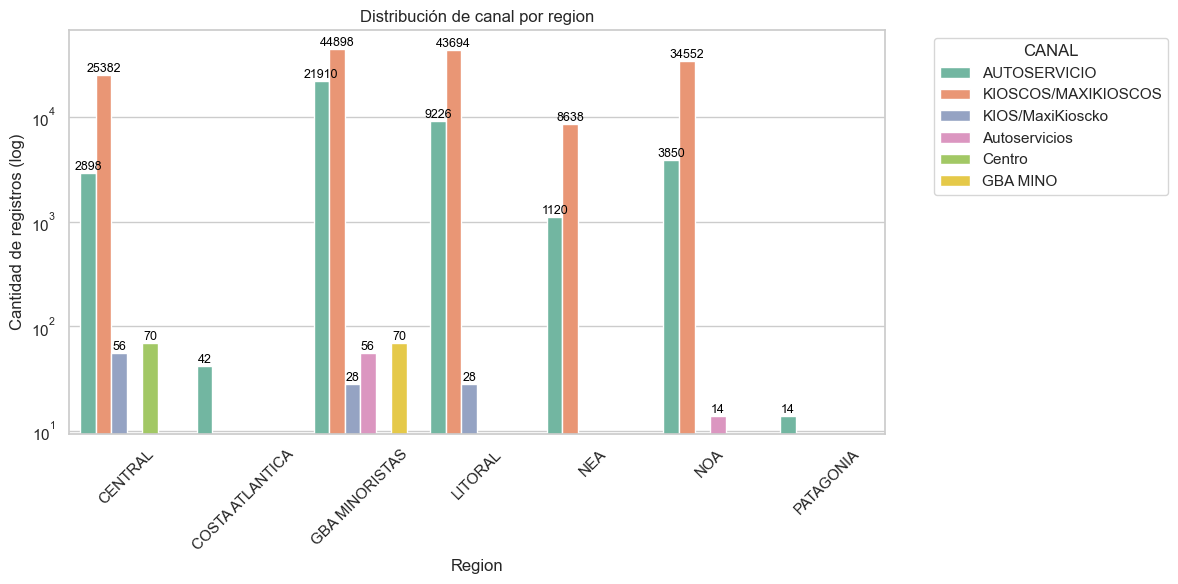

In [13]:
plot_countplot(df, category_col='region', hue='canal')

Obs: Se observan inconsistencias en la variable categórica 'canal':
- Hay valores que deben agruparse y que están escritos de manera diferente.
- Centro y GBA MINO no parecen ser canales reales, probablemente sean errores mal cargados en el dataframe y corresponda a la región.

In [14]:
df.describe()

,aniomes,fecha,minutos_visitados_mes,cantidad_heladeras,venta_total_negocios_mes,cantidad_productos_total_negocios_vendidos_mes,cantidad_compras_total_negocios_mes,dias_entre_compras_total_negocios_mes,venta_negocio1_mes,venta_negocio2_mes,venta_negocio3_mes,venta_negocio4_mes
count,196546.000000,196546,196546.000000,182507.000000,182511.000000,182507.000000,182507.000000,182507.000000,182507.000000,182507.000000,182507.000000,182507.000000
mean,202441.928571,2024-10-16 01:42:51.428571648,-227.837695,1.077307,309.769600,7.217356,12.564493,4.034395,1.475478,0.918554,0.497529,0.015603
min,202404.000000,2024-04-01 00:00:00,-999999.000000,0.000000,-4.652640,0.000000,0.000000,0.000000,-3.405600,-8.165000,-10.035000,-0.090000
25%,202407.000000,2024-07-01 00:00:00,14.916667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,202410.500000,2024-10-16 12:00:00,30.075000,0.000000,0.300000,4.000000,6.000000,1.350000,0.028380,0.030000,0.000000,0.000000
75%,202502.000000,2025-02-01 00:00:00,62.116667,2.000000,1.677000,10.000000,17.000000,3.750000,0.747840,0.510000,0.000000,0.000000
max,202505.000000,2025-05-01 00:00:00,1708.666667,78.000000,999999.000000,111.000000,591.000000,715.000000,1067.239360,2069.708840,678.780000,405.000000
std,45.574959,NaN,16878.356440,1.748559,17513.887106,9.322748,19.766357,12.143339,10.297871,10.304834,4.100986,1.283793


Obs: Se observan valores incoherentes (negativos) para cantidades númericas temporales o cantidades de ventas por lo tanto habrá que imputar o eliminar dichos valores del DataFrame.
A su vez, se observan placeholders (-999999 y 999999) que habrá que reemplazar por valores NaN

### Reemplazar placeholders (-999999 y 999999) por NaN

In [15]:
df = replace_placeholders(df)
df.describe()

,aniomes,fecha,minutos_visitados_mes,cantidad_heladeras,venta_total_negocios_mes,cantidad_productos_total_negocios_vendidos_mes,cantidad_compras_total_negocios_mes,dias_entre_compras_total_negocios_mes,venta_negocio1_mes,venta_negocio2_mes,venta_negocio3_mes,venta_negocio4_mes
count,196546.000000,196546,196490.000000,182507.000000,182455.000000,182507.000000,182507.000000,182507.000000,182507.000000,182507.000000,182507.000000,182507.000000
mean,202441.928571,2024-10-16 01:42:51.428571648,57.098867,1.077307,2.939988,7.217356,12.564493,4.034395,1.475478,0.918554,0.497529,0.015603
min,202404.000000,2024-04-01 00:00:00,0.000000,0.000000,-4.652640,0.000000,0.000000,0.000000,-3.405600,-8.165000,-10.035000,-0.090000
25%,202407.000000,2024-07-01 00:00:00,14.916667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,202410.500000,2024-10-16 12:00:00,30.083333,0.000000,0.300000,4.000000,6.000000,1.350000,0.028380,0.030000,0.000000,0.000000
75%,202502.000000,2025-02-01 00:00:00,62.133333,2.000000,1.673550,10.000000,17.000000,3.750000,0.747840,0.510000,0.000000,0.000000
max,202505.000000,2025-05-01 00:00:00,1708.666667,78.000000,2069.747220,111.000000,591.000000,715.000000,1067.239360,2069.708840,678.780000,405.000000
std,45.574959,NaN,78.170251,1.748559,17.380560,9.322748,19.766357,12.143339,10.297871,10.304834,4.100986,1.283793


Cantidad de heladeras = 78 es un dato válido?

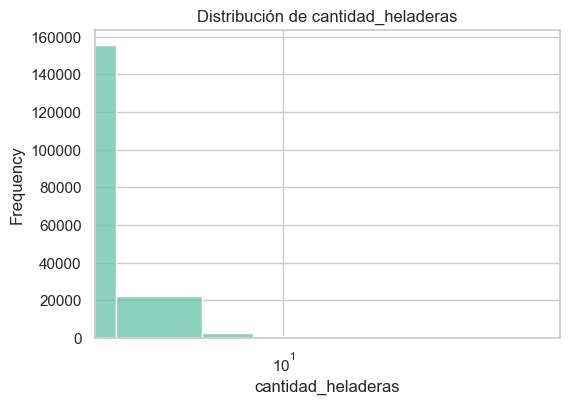

In [16]:
plot_histogram(df,'cantidad_heladeras', title='Distribución de cantidad_heladeras', kde=False, log=True)

In [17]:
df[df['cantidad_heladeras']>50]

,cliente_id,aniomes,fecha,canal,region,minutos_visitados_mes,cantidad_heladeras,venta_total_negocios_mes,cantidad_productos_total_negocios_vendidos_mes,cantidad_compras_total_negocios_mes,dias_entre_compras_total_negocios_mes,venta_negocio1_mes,venta_negocio2_mes,venta_negocio3_mes,venta_negocio4_mes
2835,312049f693ee596351c2ed26db82fba9,202505,2025-05-01,KIOSCOS/MAXIKIOSCOS,NEA,0.000000,78.0,0.00000,0.0,0.0,0.000000,0.00000,0.00,0.0,0.0
37382,312049f693ee596351c2ed26db82fba9,202412,2024-12-01,KIOSCOS/MAXIKIOSCOS,NEA,0.000000,78.0,0.00000,0.0,0.0,0.000000,0.00000,0.00,0.0,0.0
44303,312049f693ee596351c2ed26db82fba9,202502,2025-02-01,KIOSCOS/MAXIKIOSCOS,NEA,0.000000,78.0,0.00000,0.0,0.0,0.000000,0.00000,0.00,0.0,0.0
51101,312049f693ee596351c2ed26db82fba9,202406,2024-06-01,KIOSCOS/MAXIKIOSCOS,NEA,29.750000,78.0,26.55600,5.0,13.0,2.384615,8.73600,17.82,0.0,0.0
51102,312049f693ee596351c2ed26db82fba9,202411,2024-11-01,KIOSCOS/MAXIKIOSCOS,NEA,0.000000,78.0,0.00000,0.0,0.0,0.000000,0.00000,0.00,0.0,0.0
92167,312049f693ee596351c2ed26db82fba9,202501,2025-01-01,KIOSCOS/MAXIKIOSCOS,NEA,0.000000,78.0,0.00000,0.0,0.0,0.000000,0.00000,0.00,0.0,0.0
119621,312049f693ee596351c2ed26db82fba9,202407,2024-07-01,KIOSCOS/MAXIKIOSCOS,NEA,32.183333,78.0,61.02000,12.0,34.0,0.794118,22.32000,27.00,11.7,0.0
126621,312049f693ee596351c2ed26db82fba9,202503,2025-03-01,KIOSCOS/MAXIKIOSCOS,NEA,0.000000,78.0,0.00000,0.0,0.0,0.000000,0.00000,0.00,0.0,0.0
133441,312049f693ee596351c2ed26db82fba9,202405,2024-05-01,KIOSCOS/MAXIKIOSCOS,NEA,26.316667,78.0,76.41000,8.0,24.0,1.291667,0.00000,76.41,0.0,0.0
133442,312049f693ee596351c2ed26db82fba9,202408,2024-08-01,KIOSCOS/MAXIKIOSCOS,NEA,27.050000,78.0,105.21248,11.0,42.0,0.690476,69.19248,36.00,0.0,0.0


Obs: Todos los valores de 'cantidad_heladeras' = 78 pertenecen al mismo cliente. A su vez los registros (distinto de cero) de ventas totales para este cliente son altos.

En la próxima función (dentro del módulo src/eda.py) se diferencian explícitamente los valores nulos (NaN) de aquellos que son ceros válidos.

In [18]:
check_nulls_nans(df)

Número total de filas en el DataFrame: 196546


,n_nans,%_nans,n_ceros,%_ceros
venta_total_negocios_mes,14091,7.17,63490,32.30
venta_negocio4_mes,14039,7.14,176772,89.94
venta_negocio3_mes,14039,7.14,146120,74.34
cantidad_heladeras,14039,7.14,94928,48.30
venta_negocio1_mes,14039,7.14,89258,45.41
venta_negocio2_mes,14039,7.14,84026,42.75
cantidad_productos_total_negocios_vendidos_mes,14039,7.14,56529,28.76
cantidad_compras_total_negocios_mes,14039,7.14,56529,28.76
dias_entre_compras_total_negocios_mes,14039,7.14,56529,28.76
minutos_visitados_mes,56,0.03,21434,10.91


Obs: Se observan valores NaN en el target, que antes eran placeholders. Dado que son pocos valores (<0.03%), voy a eliminar esas filas del DataFrame

In [19]:
df_clean = df.dropna(subset=[target])
check_nulls_nans(df_clean)

Número total de filas en el DataFrame: 196490


,n_nans,%_nans,n_ceros,%_ceros
venta_total_negocios_mes,14087,7.17,63463,32.30
venta_negocio4_mes,14035,7.14,176720,89.94
venta_negocio3_mes,14035,7.14,146072,74.34
cantidad_heladeras,14035,7.14,94889,48.29
venta_negocio1_mes,14035,7.14,89221,45.41
venta_negocio2_mes,14035,7.14,83999,42.75
cantidad_productos_total_negocios_vendidos_mes,14035,7.14,56504,28.76
cantidad_compras_total_negocios_mes,14035,7.14,56504,28.76
dias_entre_compras_total_negocios_mes,14035,7.14,56504,28.76
minutos_visitados_mes,0,0.00,21434,10.91


In [20]:
cols_features = [
    'venta_total_negocios_mes', 'venta_negocio1_mes', 'venta_negocio2_mes',
    'venta_negocio3_mes', 'venta_negocio4_mes', 'cantidad_heladeras',
    'cantidad_productos_total_negocios_vendidos_mes',
    'cantidad_compras_total_negocios_mes', 'dias_entre_compras_total_negocios_mes'
]

mask_todas_nan = df[cols_features].isna().all(axis=1)
mask_target_ok = df['minutos_visitados_mes'].notna()

casos_raros = df[mask_todas_nan & mask_target_ok]
print(f"Casos con features vacías pero target presente: {casos_raros.shape[0]}")

Casos con features vacías pero target presente: 14035


Obs: Para todas las columnas con valores NaNs, los porcentajes se encuentran en el rango 7.14–7.17%. 
Existen 14035 filas enteras con estas columnas sin actividad pero con valores válidos en 'minutos_visitados_mes'

### Análisis estacional

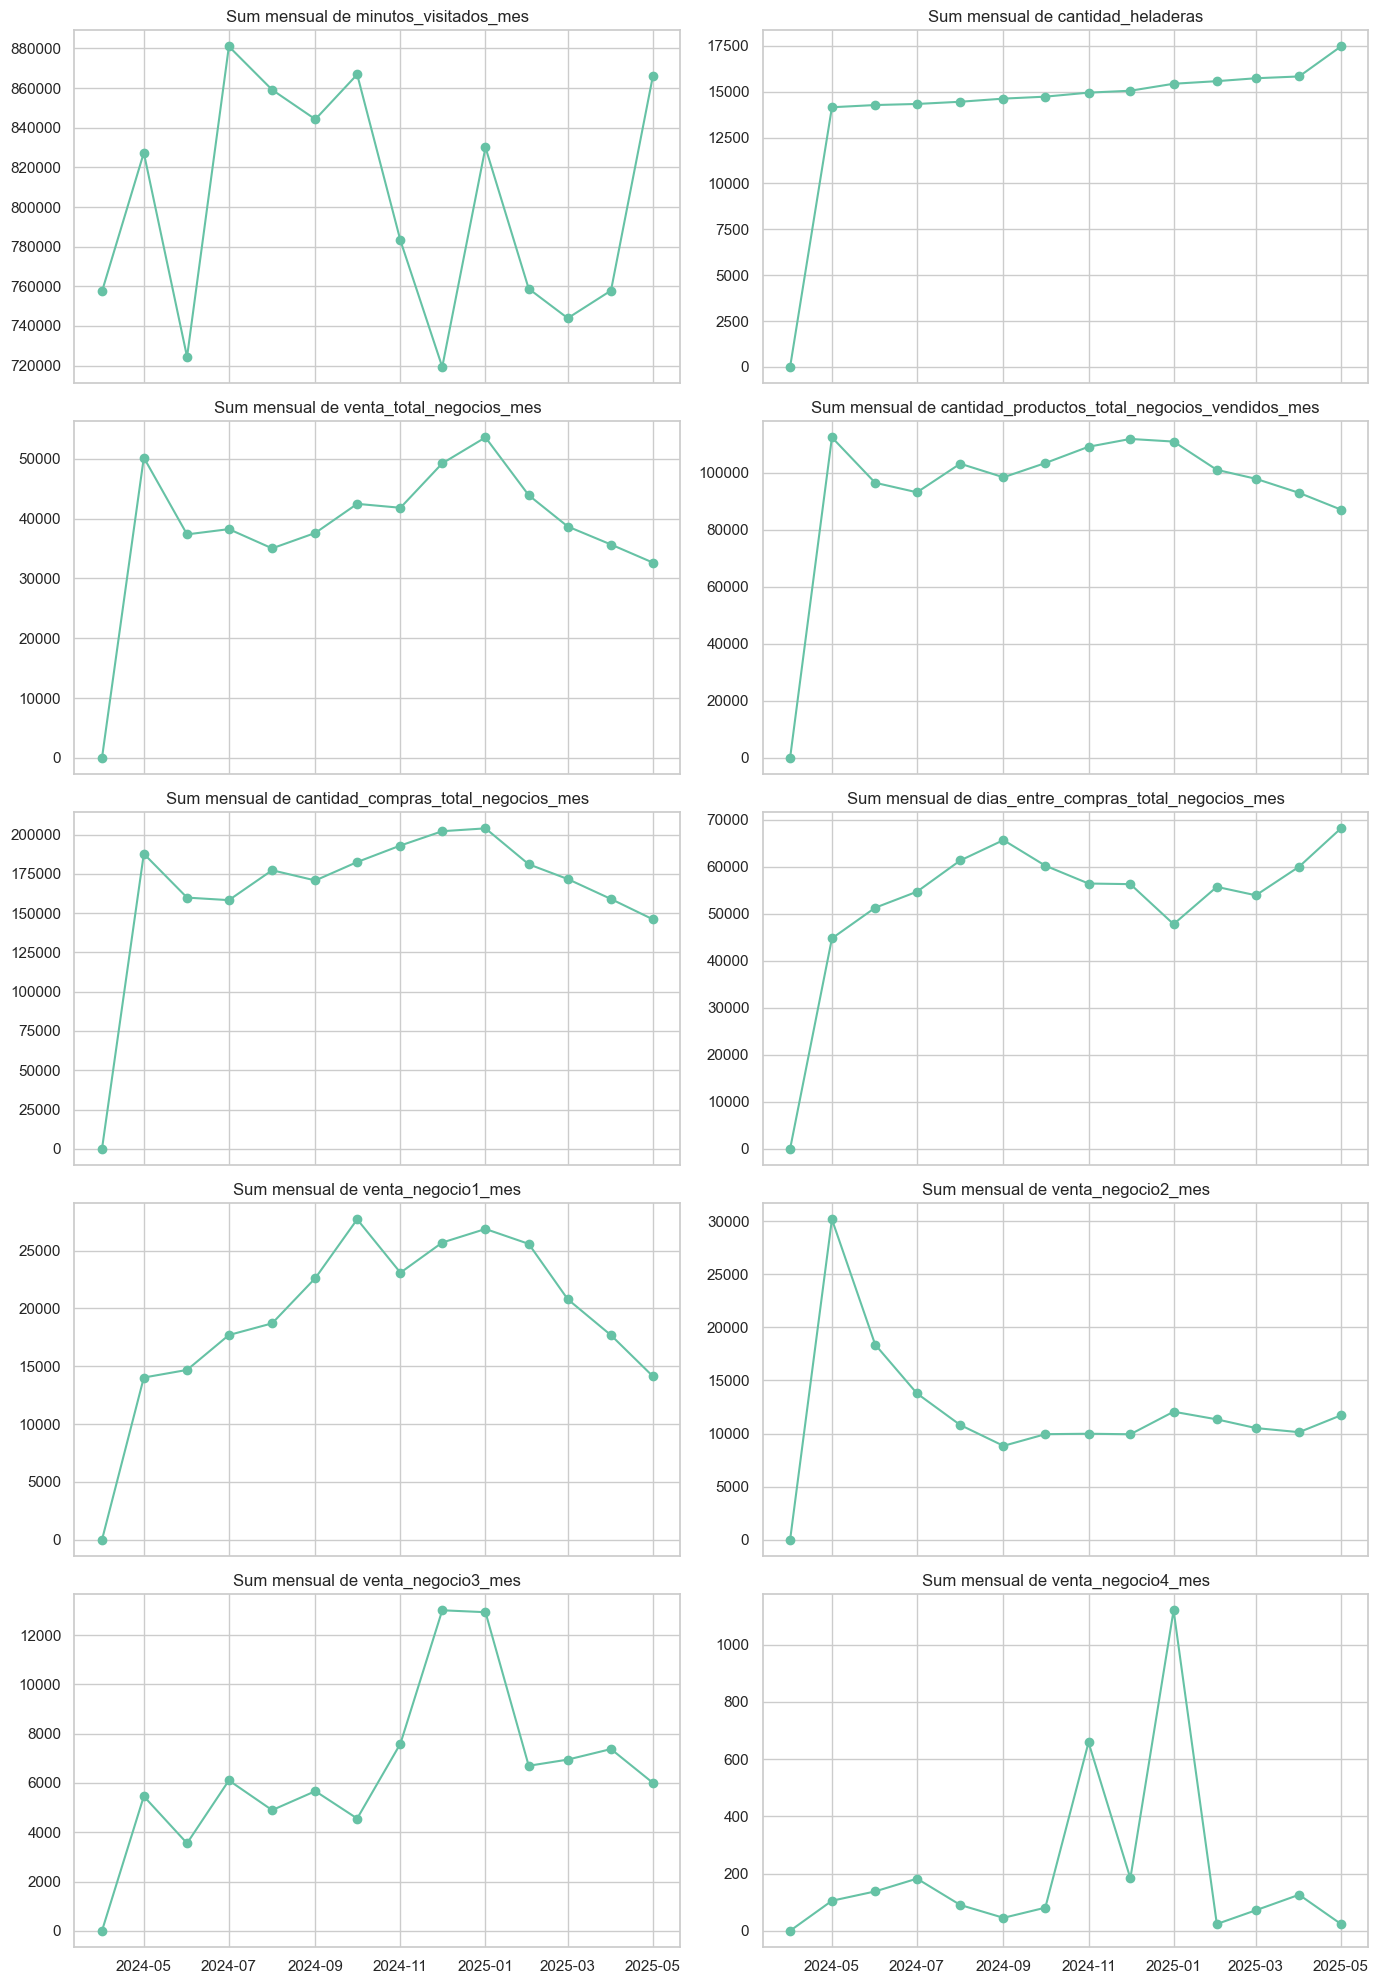

In [21]:
plot_series_mensuales_subplots(df,'fecha', exclude_cols=['aniomes', 'cliente_id'])

In [59]:
df[df['aniomes']==202404]['venta_total_negocios_mes'].isnull().sum()

14035

Obs: Las 14035 filas con valores NaN en ventas corresponden al primer mes de registo: valores faltantes debido a que no hay historial previo

---
### Conclusiones del Análisis Exploratorio de los Datos:

- Hay 25 filas duplicadas, las cuales fueron eliminadas del DataFrame - La mayoría de datos duplicados son de la región LITORAL y del canal KIOSCOS/MAXIKIOSCOS 
- Hay 14308 clientes únicos
- Hay registros de 14 meses, desde el 04-2024 al 05-2025
- En la categoría 'canal' hay valores que están mal escritos y deben corregirse
- Todos los valores de 'cantidad_heladeras' = 78 pertenecen al mismo cliente. Probablemente sea un cliente mayorista y sean outliers válidos, ya que la venta del total de los negocios que tuvo el cliente en unidad Hl son valores altos.


**A partir de análisis estadísticos**:

- Se observan valores mínimos negativos en las columnas ['venta_total_negocios_mes', 'venta_negocio1_mes', 'venta_negocio2_mes', 'venta_negocio3_mes', 'venta_negocio4_mes']. Son datos válidos? corresponden a devoluciones?

- Valores mínimos y máximos -999999 y 999999 respectivamente, probablemente sean valores placeholders y fueron reemplazados por valores NaN.

- Muchas variables numéricas presentan distribuciones sesgadas con más del 50% de valores iguales a 0.
- Las variables de ventas tienen valores máximos muy altos, indicando presencia de outliers.

**A partir de análisis de valores nulos y faltantes**:
- Existen 14035 filas que no poseen registros para las features numéricas pero sí para el target 'minutos_visitados_mes'
- Casi el 90% de los valores de 'venta_negocio4_mes' son cero. Por lo tanto la mayoría de los clientes no tienen actividad de ese negocio. Lo mismo con 'venta_negocio3_mes'

**A partir de análisis mensuales**:
- Las 14035 filas con valores NaN se corresponden al primer mes del registro (2024-04): No hay datos por falta de historial
- Se observa un aumento de ventas y cantidad de productos en épocas festivas o meses de verano. También se registra un aumento de frecuencia en la visita al cliente en estas fechas (menores valores de "días entre compras"). Sin embargo estas relaciones no se vinculan directamente con el tiempo de visita por mes (más fluctuante)

---

## Limpieza

En base a lo observado en el Análisis Exploratorio de los Datos, se realiza una limpieza de los datos.

### Estandarizar variables categóricas

In [22]:
mapeo_canal = {
    'AUTOSERVICIO': 'AUTOSERVICIO',
    'AUTOSERVICIOS': 'AUTOSERVICIO',
    'KIOSCOS/MAXIKIOSCOS': 'KIOSCOS/MAXIKIOSCOS',
    'KIOS/MAXIKIOSCKO': 'KIOSCOS/MAXIKIOSCOS',
    'GBA MINO': 'GBA MINORISTAS',
    'CENTRO': 'CENTRAL'
}

df = estandarizar_categorias(df, 'canal', mapeo=mapeo_canal)
resumen_unique_values(df)

,columna,valores_unicos,valores
1,region,7,"[LITORAL, GBA MINORISTAS, NEA, CENTRAL, NOA, COSTA ATLANTICA, PATAGONIA]"
0,canal,4,"[AUTOSERVICIO, KIOSCOS/MAXIKIOSCOS, CENTRAL, GBA MINORISTAS]"


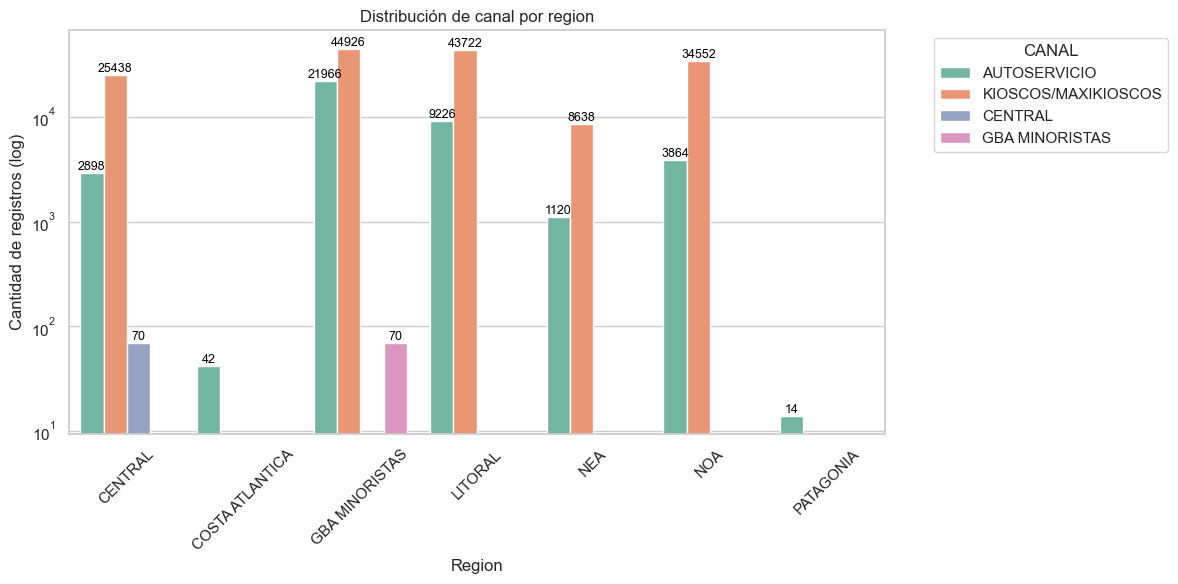

In [23]:
plot_countplot(df, category_col='region', hue='canal')

### Analizar columnas iguales e imputar valores erróneos

In [24]:
verificar_columnas_iguales(df, 'region', 'canal')


{'cantidad': 140, 'valores_iguales': ['CENTRAL', 'GBA MINORISTAS']}

Dado que los valores erróneos (mal cargados) en la columna 'canal' corresponden a 0.071% del total de entradas, estos valores se van a imputar por el valor de 'canal' más frecuente del mismo cliente_id

In [25]:
df_clean = imputar_por_cliente(df, 'canal', 'region')

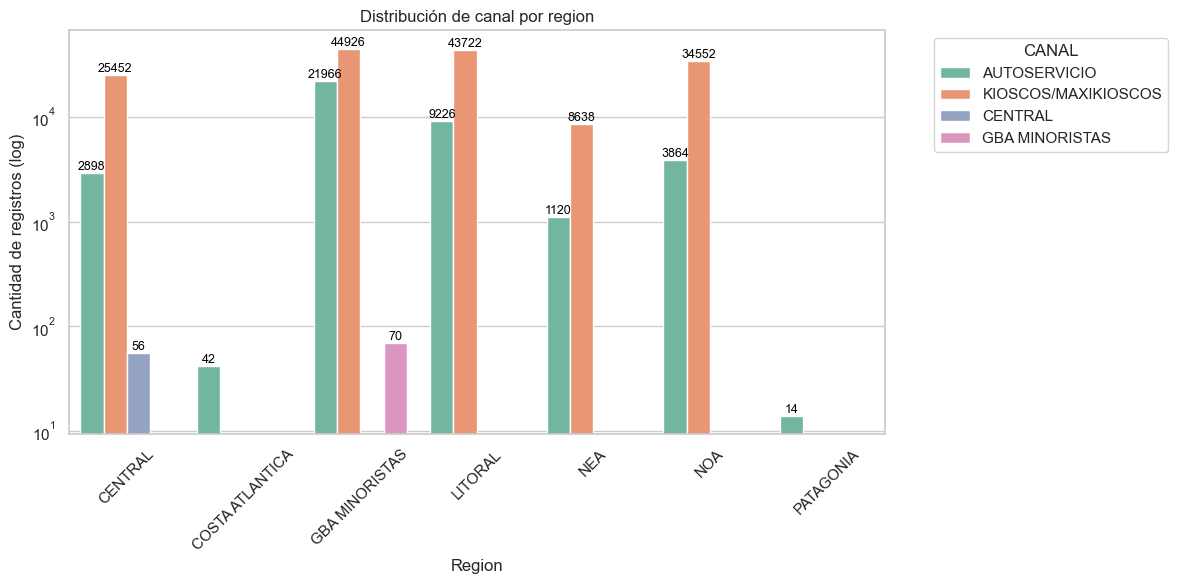

In [26]:
plot_countplot(df_clean, category_col='region', hue='canal')

Obs: Como puede verse esta estrategia de imputación no resuelve todos los casos. Existen clientes que solo tienen registros mal cargados, es decir, todos sus registros poseen 'region'=='canal'.

Voy a imputar los casos erroneos según la moda regional

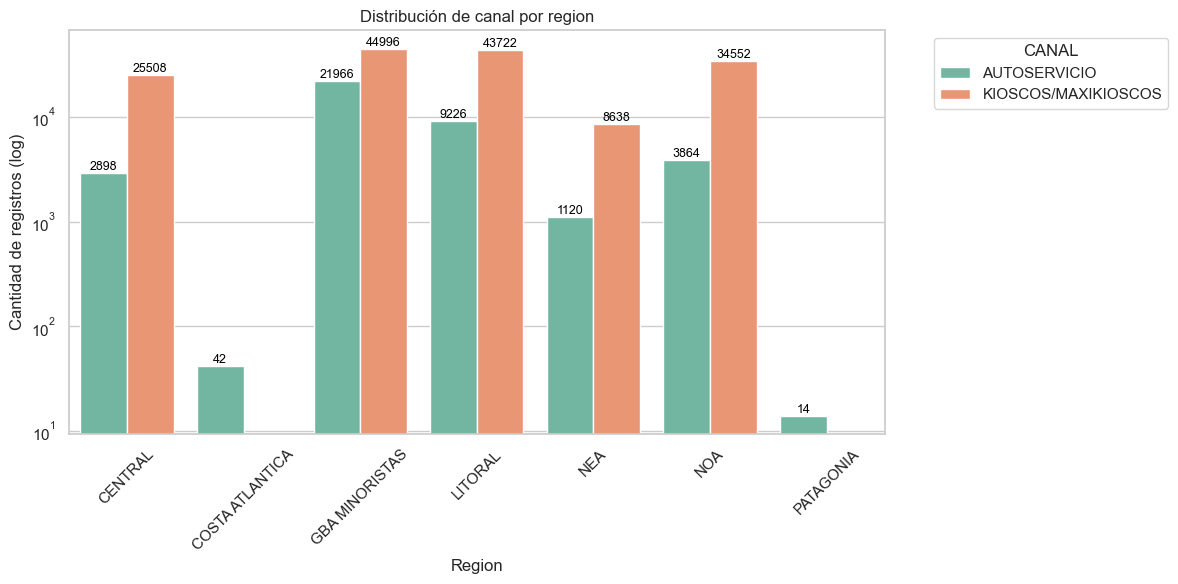

In [27]:
df_clean = imputar_por_moda_regional(df_clean)
plot_countplot(df_clean, category_col='region', hue='canal')

Obs: La mayoría de las regiones poseen muchos más kioskos/maxikioscos que Autoservicios, salvo las regiones COSTA ATLANTICA Y PATAGONIA que solo tienen Autorservicios

### Distribuciones sin outliers extremos (entre percentil 1 y 99)

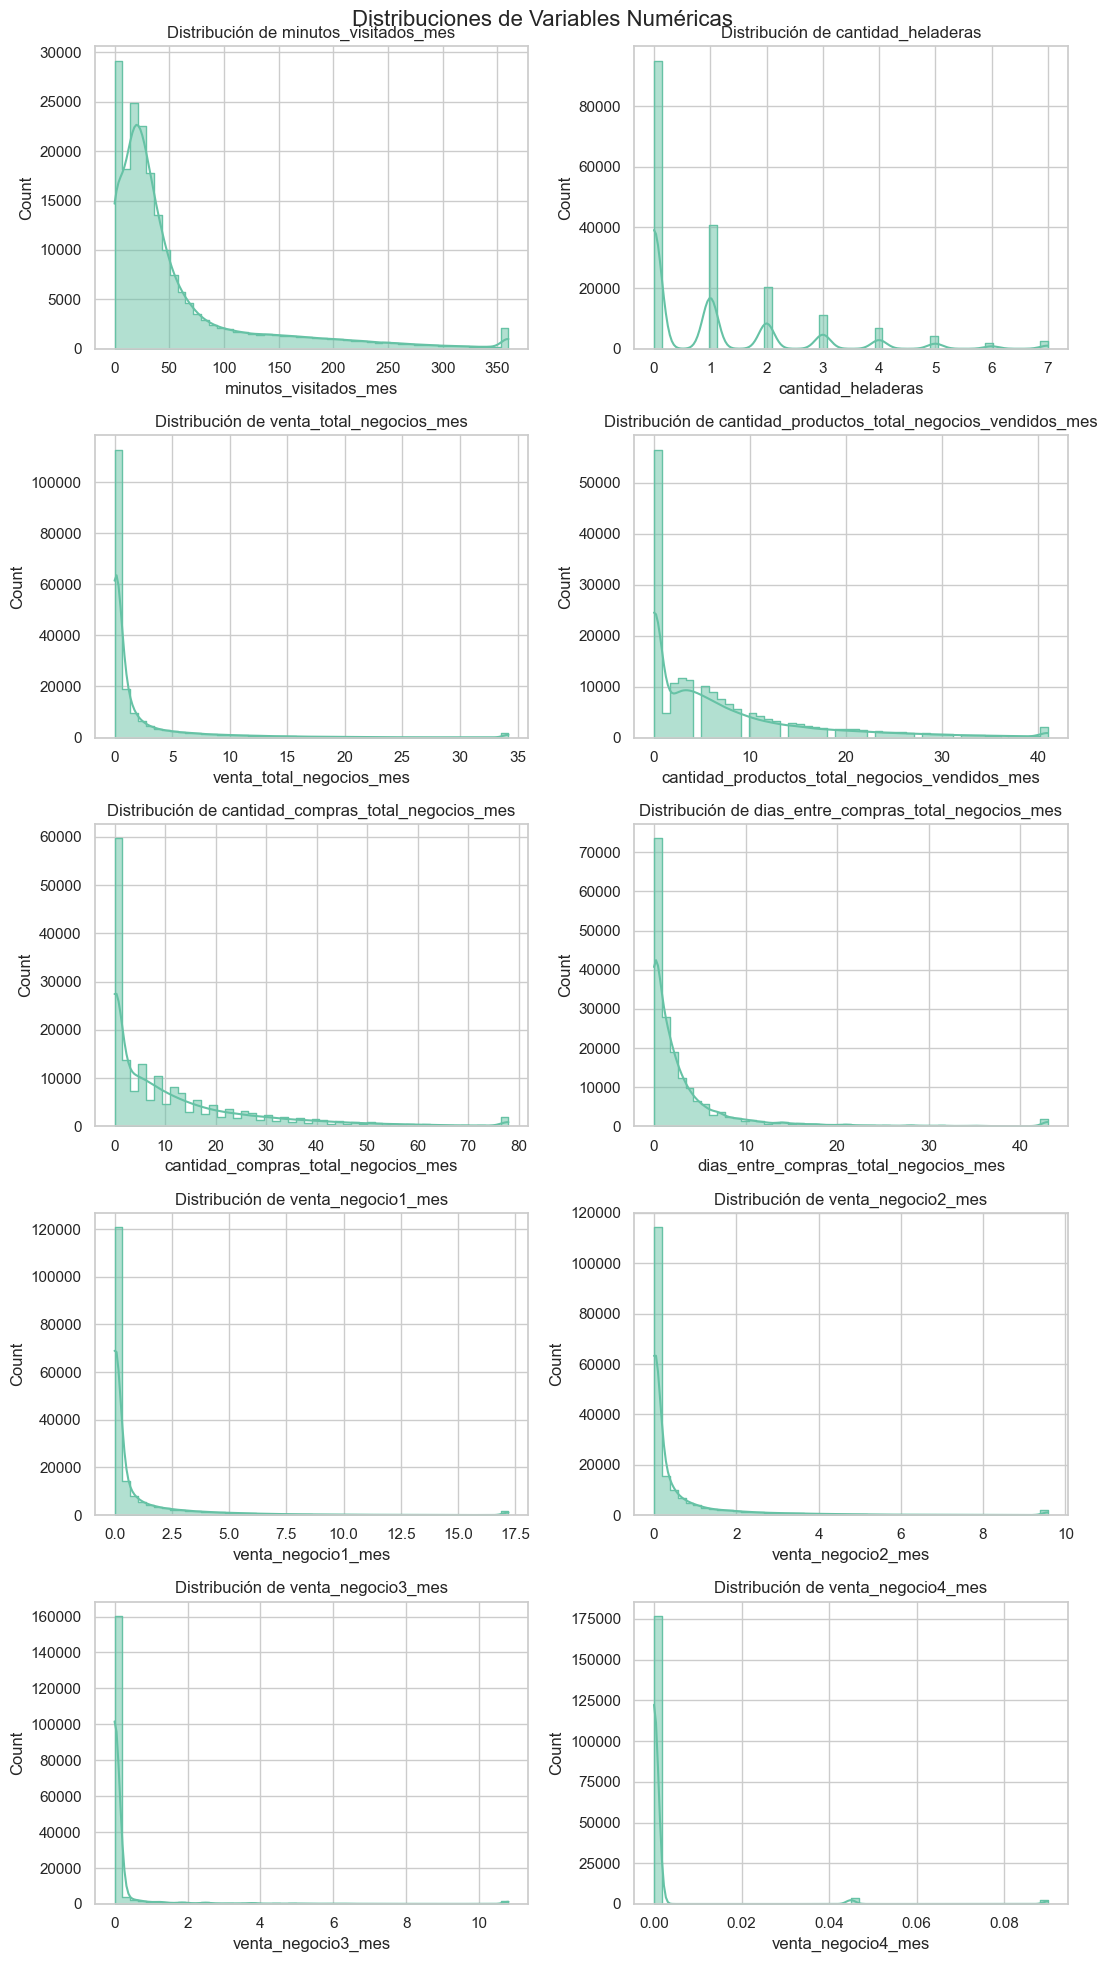

In [28]:
plot_feature_distributions(df_clean.drop(columns=['aniomes', 'cliente_id']), bins=50, cols=2, clip_outliers=True, include_categorical=False, log=False)

### Distribuciones con datos completos

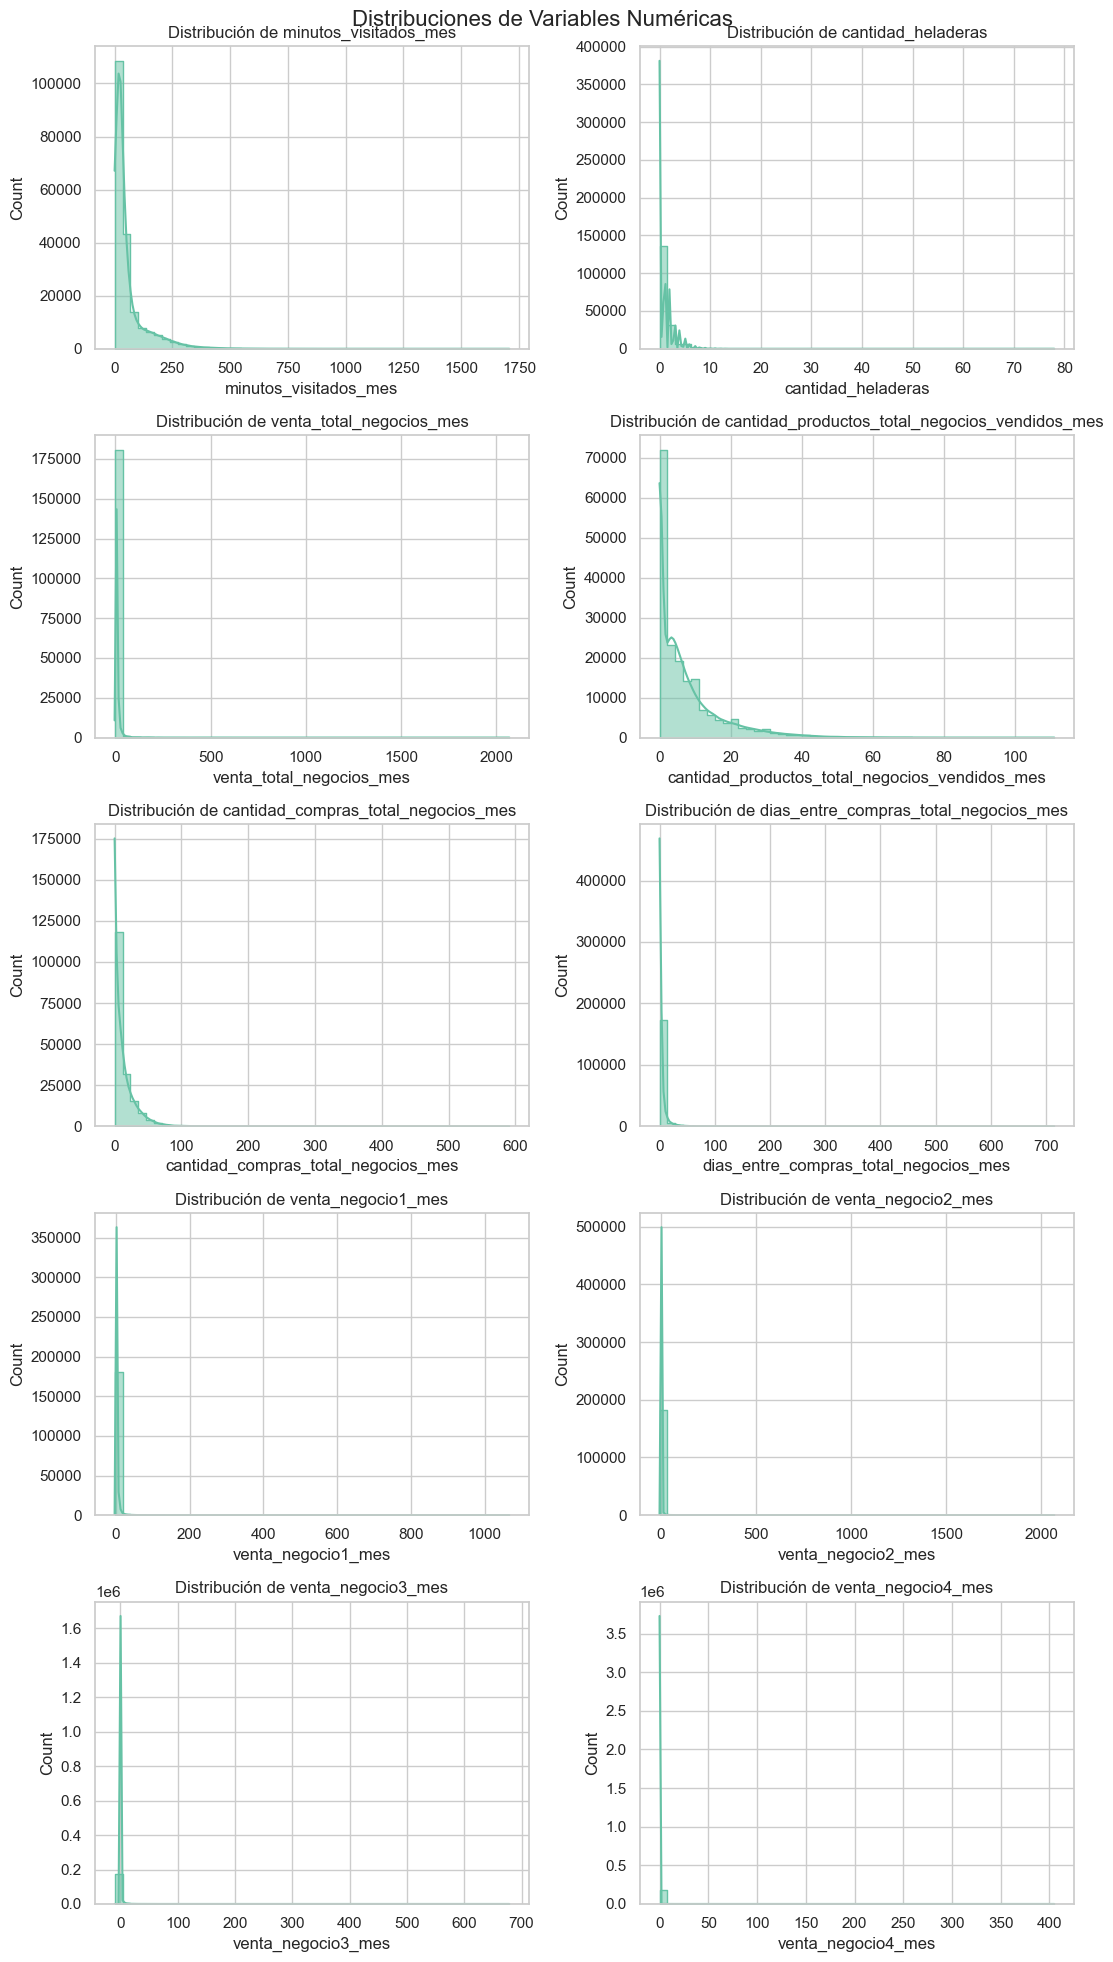

In [29]:
plot_feature_distributions(df_clean.drop(columns=['aniomes', 'cliente_id']), bins=50, cols=2, clip_outliers=False, include_categorical=False, log=False)

### Valores negativos

Dado que no sé si valores negativos pueden significar datos válidos (por ej. devoluciones), voy a investigarlos

In [30]:
cols_numericas = [
    'venta_total_negocios_mes',
    'venta_negocio1_mes', 'venta_negocio2_mes',
    'venta_negocio3_mes', 'venta_negocio4_mes'
]

df_negativos = df_clean[df_clean[cols_numericas].lt(0).any(axis=1)]
print(f'Porcentaje de filas con valores negativos: {len(df_negativos)/len(df_clean)*100:.2f} %' )

Porcentaje de filas con valores negativos: 0.60 %


In [31]:
# Analizar cuántos valores negativos en las columnas numéricas son "significativos" (menores a -0.1)
umbral_significativo = -0.1

negativos_significativos = {}
for col in cols_numericas:
    if col in df_negativos.columns:
        count_significativos = (df_negativos[col] < umbral_significativo).sum()
        count_total_negativos = (df_negativos[col] < 0).sum()
        negativos_significativos[col] = {
            'total_negativos': count_total_negativos,
            'significativos': count_significativos
        }

negativos_significativos

{'venta_total_negocios_mes': {'total_negativos': 335, 'significativos': 44},
 'venta_negocio1_mes': {'total_negativos': 335, 'significativos': 99},
 'venta_negocio2_mes': {'total_negativos': 531, 'significativos': 279},
 'venta_negocio3_mes': {'total_negativos': 138, 'significativos': 75},
 'venta_negocio4_mes': {'total_negativos': 6, 'significativos': 0}}

In [33]:
# Los negativos no significativos (mayores a -0.1) los reemplazo por 0
for col in cols_numericas:
    df_clean.loc[(df_clean[col] < 0) & (df_clean[col] >= umbral_significativo), col] = 0

### Imputar NaN en ventas por ceros (datos no registrados por falta de historial)

In [34]:
df_clean = df_clean.fillna(0)
check_nulls_nans(df_clean)

Número total de filas en el DataFrame: 196546


,n_nans,%_nans,n_ceros,%_ceros
venta_negocio4_mes,0,0.0,190817,97.09
venta_negocio3_mes,0,0.0,160222,81.52
cantidad_heladeras,0,0.0,108967,55.44
venta_negocio1_mes,0,0.0,103533,52.68
venta_negocio2_mes,0,0.0,98317,50.02
venta_total_negocios_mes,0,0.0,77872,39.62
cantidad_productos_total_negocios_vendidos_mes,0,0.0,70568,35.90
cantidad_compras_total_negocios_mes,0,0.0,70568,35.90
dias_entre_compras_total_negocios_mes,0,0.0,70568,35.90
minutos_visitados_mes,0,0.0,21490,10.93


### Análisis de outliers

In [35]:
numeric_features = df_clean.select_dtypes(include='number').columns.drop('aniomes').to_list()
numeric_features

['minutos_visitados_mes',
 'cantidad_heladeras',
 'venta_total_negocios_mes',
 'cantidad_productos_total_negocios_vendidos_mes',
 'cantidad_compras_total_negocios_mes',
 'dias_entre_compras_total_negocios_mes',
 'venta_negocio1_mes',
 'venta_negocio2_mes',
 'venta_negocio3_mes',
 'venta_negocio4_mes']

In [36]:
utils.analisis_completo_columnas(df_clean[numeric_features])

,columna,media,mediana,std,asimetria,curtosis,outliers_iqr,outliers_pct,es_normal,diferencia_media_mediana
0,minutos_visitados_mes,57.082599,30.075000,78.165055,3.396575,21.239891,24058,12.240392,False,27.007599
1,cantidad_heladeras,1.000356,0.000000,1.707643,8.038185,279.307828,26679,13.573922,False,1.000356
2,venta_total_negocios_mes,2.729217,0.210000,16.763103,44.604991,3554.241600,29055,14.782799,False,2.519217
3,cantidad_productos_total_negocios_vendidos_mes,6.701831,4.000000,9.173901,2.220960,6.753828,13988,7.116909,False,2.701831
4,cantidad_compras_total_negocios_mes,11.667030,5.000000,19.320242,5.974348,84.539488,12709,6.466171,False,6.667030
5,dias_entre_compras_total_negocios_mes,3.746224,1.142857,11.747650,16.827991,510.233911,18404,9.363711,False,2.603367
6,venta_negocio1_mes,1.370112,0.000000,9.930544,39.197936,2367.319053,31225,15.886866,False,1.370112
7,venta_negocio2_mes,0.852977,0.000000,9.932799,111.543576,18548.556179,27676,14.081182,False,0.852977
8,venta_negocio3_mes,0.461999,0.000000,3.953884,62.981332,7343.217903,36324,18.481170,False,0.461999
9,venta_negocio4_mes,0.014490,0.000000,1.237100,288.086314,88076.973046,5729,2.914839,False,0.014490


Obs: Todas las columnas numéricas presentan outliers, definidos como valores fuera del rango [Q1 − 1.5×IQR, Q3 + 1.5×IQR]. La variable con mayor proporción de outliers es 'venta_negocio3_mes', con más del 18%.
Además, todas las variables muestran asimetría positiva, lo que indica distribuciones sesgadas hacia la derecha, con colas largas de valores altos.
Asimismo, la curtosis positiva en todos los casos refleja distribuciones con picos marcados y una fuerte concentración de valores cerca de cero, muchos de ellos nulos o bajos.

Estos outliers pueden representar clientes especiales y se buscará analizarlos de manera diferente 

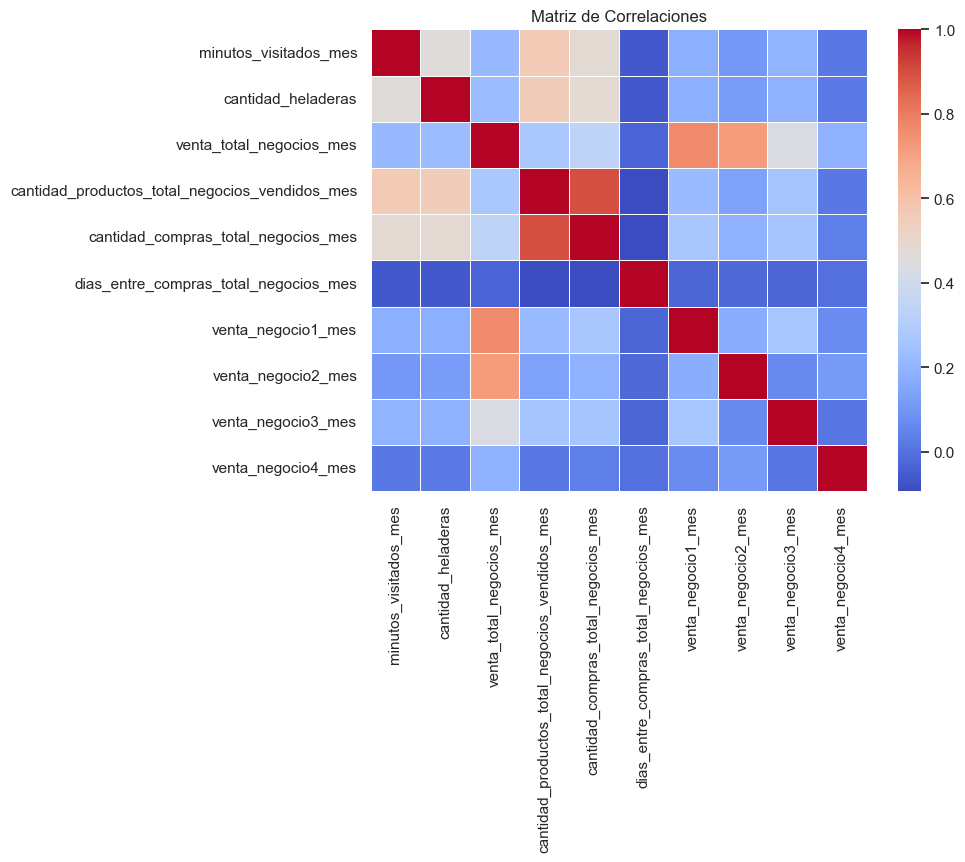

Pares de variables altamente correlacionadas:
cantidad_productos_total_negocios_vendidos_mes - cantidad_compras_total_negocios_mes: 0.899


In [37]:
utils.high_correlation(df_clean[numeric_features])

### Ranking de clientes

In [38]:
ranking_ventas = df_clean.groupby('cliente_id')['venta_total_negocios_mes'].sum().reset_index()
ranking_ventas = ranking_ventas.sort_values(by='venta_total_negocios_mes', ascending=False).reset_index(drop=True)
ranking_ventas.head(10)

,cliente_id,venta_total_negocios_mes
0,4287a574ace354de2bdb68b16cff63df,7088.26076
1,a8d7a94c59bd58456b330d1d496227ae,5756.94884
2,7c74aa66e32a6ab05b043b02cee501bb,5610.49097
3,cfdd0ec5a9c983616e7813cf9607ba92,4317.68456
4,4deed4cc9373a0c4fb3e07c8dc0e57a2,4233.57694
5,5e36317c7dabe9ba2764f6646144087d,4178.96192
6,8a3147de4de8217fee0eae411fe45f29,3380.80718
7,bd4c9ab730f5513206b999ec0d90d1fb,3245.46133
8,e7b535b278ad6f9fd2a69ede17cb7e2c,2982.48012
9,97a3e6ef2f020ad96eb92185cc8727d4,2762.41504


### Ventas por negocio

In [39]:
ventas_por_negocio = {
    col: df_clean[col].sum()
    for col in ['venta_negocio1_mes', 'venta_negocio2_mes', 'venta_negocio3_mes', 'venta_negocio4_mes']
}
negocio_mayor_ventas = max(ventas_por_negocio, key=ventas_por_negocio.get)
ventas_por_negocio

{'venta_negocio1_mes': 269290.12857,
 'venta_negocio2_mes': 167649.16044999997,
 'venta_negocio3_mes': 90804.10849999999,
 'venta_negocio4_mes': 2847.8700000000003}

## CONCLUSIONES FINALES DEL EDA

- El dataframe posee 25 duplicados los cuales han sido eliminados
- Existe un total de 14034 clientes únicos 
- Estos clientes se separan en 7 regiones distintas: [CENTRAL, COSTA ATLANTICA, GBA MINORISTAS, LITORAL, NEA, NOA, PATAGONIA]
- En cada región existen 2 canales: [AUTOSERVICIO, KIOSKOS/MAXIKIOSCOS], salvo en COSTA ATLÁNTICA Y PATAGONIA que solo existen clientes con AUTOSERVICIO 
- El primer mes registrado (2024-04) no posee información en variables numéricas (valores faltantes debido a historial previo)

### 1. Número de clientes por canal y región

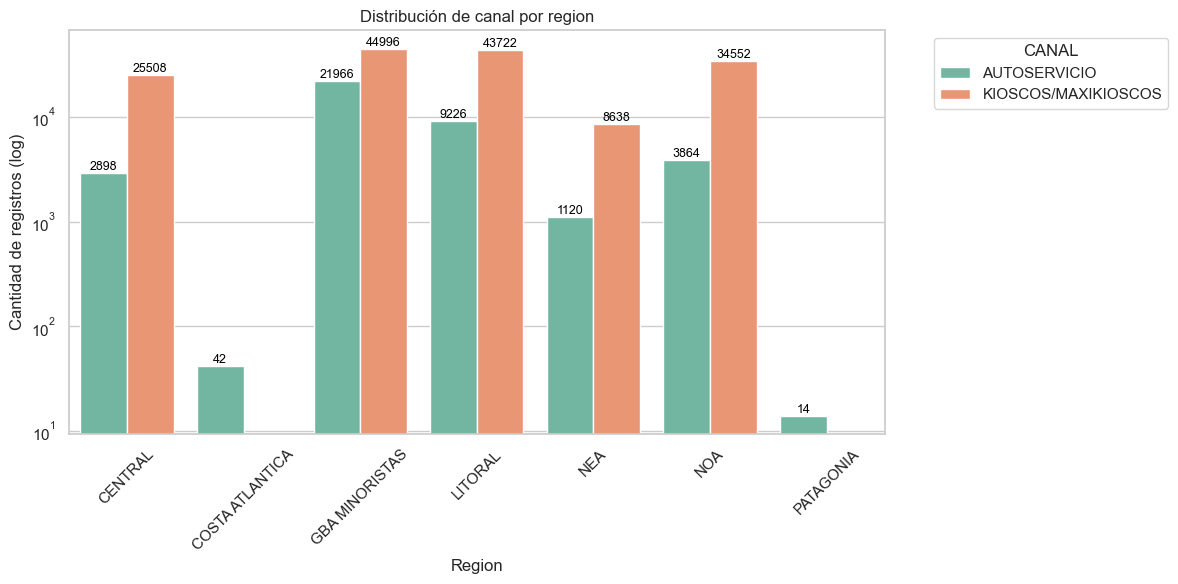

In [40]:
plot_countplot(df_clean, category_col='region', hue='canal')

### 2. Ranking de clientes por venta total

Los mejores 10 clientes por venta total

In [ ]:
ranking_ventas.head(10)

,cliente_id,venta_total_negocios_mes
0,4287a574ace354de2bdb68b16cff63df,7088.26076
1,a8d7a94c59bd58456b330d1d496227ae,5756.94884
2,7c74aa66e32a6ab05b043b02cee501bb,5610.49097
3,cfdd0ec5a9c983616e7813cf9607ba92,4317.68456
4,4deed4cc9373a0c4fb3e07c8dc0e57a2,4233.57694
5,5e36317c7dabe9ba2764f6646144087d,4178.96192
6,8a3147de4de8217fee0eae411fe45f29,3380.80718
7,bd4c9ab730f5513206b999ec0d90d1fb,3245.46133
8,e7b535b278ad6f9fd2a69ede17cb7e2c,2982.48012
9,97a3e6ef2f020ad96eb92185cc8727d4,2762.41504


Los peores 10 clientes por venta total

In [38]:
ranking_ventas.tail(10)

,cliente_id,venta_total_negocios_mes
14024,8e4a325f20082ab7c5c83e15298b822d,0.0
14025,8e5bd2a68ad84aa46ed6fbdfcda952ac,0.0
14026,20ed09aa2db5c26c5f9631103f3b74dc,0.0
14027,8e7372e5daa99da335ffb378fc93c25b,0.0
14028,0812acf6881aaaf774e8642e3005abc0,0.0
14029,8eaf780b22f652abc1592becb337fdf9,0.0
14030,8ec4f0fe83682b2dbb9b75686b3828f9,0.0
14031,8ec6ada601e2321a53bbe3ee945e7aca,0.0
14032,20d0677f489338dedbd07e116ebe3bbf,0.0
14033,8670f9dfb3ebabf43fc52aa8b1cd0ce0,0.0


### 3. El negocio con más ventas en la empresa

In [39]:
print(f"El negocio con más ventas es: {negocio_mayor_ventas} ({ventas_por_negocio[negocio_mayor_ventas]:.2f} Hl)")

El negocio con más ventas es: venta_negocio1_mes (269337.48 Hl)


### 4. Presencia de Outliers

In [41]:
utils.analisis_completo_columnas(df_clean[numeric_features])

,columna,media,mediana,std,asimetria,curtosis,outliers_iqr,outliers_pct,es_normal,diferencia_media_mediana
0,minutos_visitados_mes,57.082599,30.075000,78.165055,3.396575,21.239891,24058,12.240392,False,27.007599
1,cantidad_heladeras,1.000356,0.000000,1.707643,8.038185,279.307828,26679,13.573922,False,1.000356
2,venta_total_negocios_mes,2.729217,0.210000,16.763103,44.604991,3554.241600,29055,14.782799,False,2.519217
3,cantidad_productos_total_negocios_vendidos_mes,6.701831,4.000000,9.173901,2.220960,6.753828,13988,7.116909,False,2.701831
4,cantidad_compras_total_negocios_mes,11.667030,5.000000,19.320242,5.974348,84.539488,12709,6.466171,False,6.667030
5,dias_entre_compras_total_negocios_mes,3.746224,1.142857,11.747650,16.827991,510.233911,18404,9.363711,False,2.603367
6,venta_negocio1_mes,1.370112,0.000000,9.930544,39.197936,2367.319053,31225,15.886866,False,1.370112
7,venta_negocio2_mes,0.852977,0.000000,9.932799,111.543576,18548.556179,27676,14.081182,False,0.852977
8,venta_negocio3_mes,0.461999,0.000000,3.953884,62.981332,7343.217903,36324,18.481170,False,0.461999
9,venta_negocio4_mes,0.014490,0.000000,1.237100,288.086314,88076.973046,5729,2.914839,False,0.014490


Todas las variables numéricas poseen gran cantidad de outliers. Se cree que estos valores extremos se corresponden con clientes "especiales" o mayoristas y se considera que hay que clasificarlos como tal. 
En el modelo se realizará un proceso de clustering para clasificar a los clientes en tres categorías y se usarán estas categorías como features en el modelo final


### 5.  Correlaciones entre variables numéricas

Existen correlaciones altas entre las distintas variables de ventas (por ejemplo, 'venta_total_negocios_mes' y las ventas por negocio individual),
lo cual es esperable ya que la venta total es incluye las ventas por negocio.
También se aprecian correlaciones moderadas entre la cantidad de productos vendidos, la cantidad de compras y los minutos visitados,
lo que indica que los clientes con mayor actividad tienden a comprar más productos y a realizar más compras.

La variable objetivo 'minutos_visitados_mes' muestra correlaciones moderadas con variables de actividad y ventas, lo que sugiere que estas variables pueden ser útiles para predecir el target, aunque no existe una correlación perfecta.
En general, cada variable aporta información relevante al análisis.

---

### Guardar data procesada

In [43]:
df_clean.to_csv('../data/processed/df_clean.csv', index=False)